In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
sns.set()

import warnings
warnings.filterwarnings('ignore')

## 📌Load Banglore home prices into DataFrame.

In [3]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
print('Features are : ',df1.columns)
print('\nData Shape :',df1.shape)
print('\nArea Type list : ',df1['area_type'].unique())

Features are :  Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Data Shape : (13320, 9)

Area Type list :  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [5]:
print(df1.area_type.value_counts())
df1.groupby('area_type')['area_type'].agg('count')

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## 📌Drop fearures that aren't required to build our model

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## 1️⃣ Data Cleaning.
### **A) Handling NA values**

In [7]:
print(df2.isnull().sum())
df3 = df2.dropna()
print('\n',df3.isnull().sum())
print('\n The shape now is :',df3.shape)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

 location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

 The shape now is : (13246, 5)


- **🚩 What could be done,for the bath col for example,is felling these 73 nan values with the `median` of the col. But since we have 13320 rows , we can simply drop these rows.**

### **B) There is inconsistant representation in the `size col` between `BHK (Bedroom Hall Kitchen)` & `bedroom`.So we need to fix this issue.**

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x :int(x.split()[0]))
print(df3['bhk'].unique())
df3.head()

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


- **🚩 As we can see in the unique values of th e BHK col, there is a too many bedrroms that seems unrealistic. We'll inspect more:**


In [10]:
df3[df3['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


- **It is absurd to have 43 bedrooms in a 2400 sq.ft. So we need to inspect `total_sqft col` more:**

In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- **🚩This col values is represented in 2 different ways, single value & ranges. These ranges have to be averaged.**

In [12]:
def is_float(x) :
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(lambda x: is_float(x))].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**- 🚩Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such cases to keep things simple.**

In [13]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    # To avoide errors while running the function because we have `4125Perch & 1000Sq. Meter` representation.
    try:
        return float(x)
    except:
        None

df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [14]:
df4[df4.total_sqft.isnull()].head()

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,NaN,1.0,18.5,1
648,Arekere,9 Bedroom,NaN,9.0,265.0,9
775,Basavanagara,1 BHK,NaN,2.0,93.0,1
872,Singapura Village,2 BHK,NaN,2.0,45.0,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.0,1


## 2️⃣ Feature Engineering.
- ### Price per square feet.

In [15]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


- ### Too Many Locations problem.
Location is a categorical feature that must be transformed using OneHotEncoding. The problem is that the location col contains a large number of locations. After using the above approach, we end up with an excessive number of cols, each of which represents a different location, increasing the dimensionality and the model complexity ,and hence lowering the performance:

✅So we have to reduce the number of places in the location col to solve this issue.

In [16]:
# remove any white spaces.
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5['location'].value_counts()

print(location_stats)
print('\nNum of unique location:',len(location_stats.index))

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

Num of unique location: 1293


✅We can come up with the idea that say any location that has less than 10 data points is called `Others`.This way number of    categories can be reduced by huge amount.Later on when we do OneHotEncoding, it'll help us having fewer dummy cols for the     sake of **Dimensionality Reduction**.

In [17]:
# how many location has less/more than or equal 10 data points.
print('Num of locations has less than or equal to 10 data points : ',len(location_stats[location_stats <= 10]))
print('Num of locations has more than 10 data points : ',len(location_stats[location_stats > 10]))

Num of locations has less than or equal to 10 data points :  1052
Num of locations has more than 10 data points :  241


In [18]:
# set the list.
location_stats_less_than_10 = location_stats[location_stats <= 10]
# apply
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# check
df5['location'].value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

## 3️⃣ Outlier Removal.
### Total_sqft
✅As a data scientist, when you have a conversation with your business manager who has expertise in the real estate domain, he will inform you that typically sqft per bhk is 300, so i.e., a 2 bhk apartment is a minimum of 600 sqft.If you have a 400 sqft apartment with 2 bhk then that seem suspicious and can be removed as an outlier.We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft.

In [19]:
print(df5.shape)
df5.head()

(13246, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
outliers = df5[df5['total_sqft']/df5['bhk'] <300]
print('Num of outliers : ',outliers.shape[0])

df6 = df5[~(df5['total_sqft']/df5['bhk'] <300)]
print('Now the shape of our data :',df6.shape)


Num of outliers :  744
Now the shape of our data : (12502, 7)


### Price_per_sqft

In [21]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

✅ The `price_per_sqft` col's inspection shows the wide variation in property prices. `We should remove outliers per location`(each location has its own prices limits) using mean & 1 std, assuming that the dataset has a normal ditribution which means that around 68% of the data points should lie between (m + 1_std) & (m - 1_std). So, we need to filter out any thing beyond these edges to make generic model.

![R](R.png)
![SND](SND.png)

In [22]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        desired_df = subdf[ (subdf['price_per_sqft'] > (mean-std)) & (subdf['price_per_sqft'] < (mean+std)) ]
        df_out = pd.concat([df_out,desired_df],ignore_index=True)
    return df_out
    
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

### BHK VS price.
✅**The table below shows that some properties with 2 bhk have a higher price than properties with 3 bhk in the same location and has same sqft. Maybe this is because special amenities are available there. But, for the sake of the generic model, we have to remove these data points.**

In [23]:
df7[(df7['bhk'] == 2) | (df7['bhk'] == 3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.00,3,8906.666667
...,...,...,...,...,...,...,...
10234,other,2 BHK,1095.0,2.0,57.00,2,5205.479452
10235,other,2 BHK,1256.0,2.0,65.00,2,5175.159236
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333


✅**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like for the same sqft:**

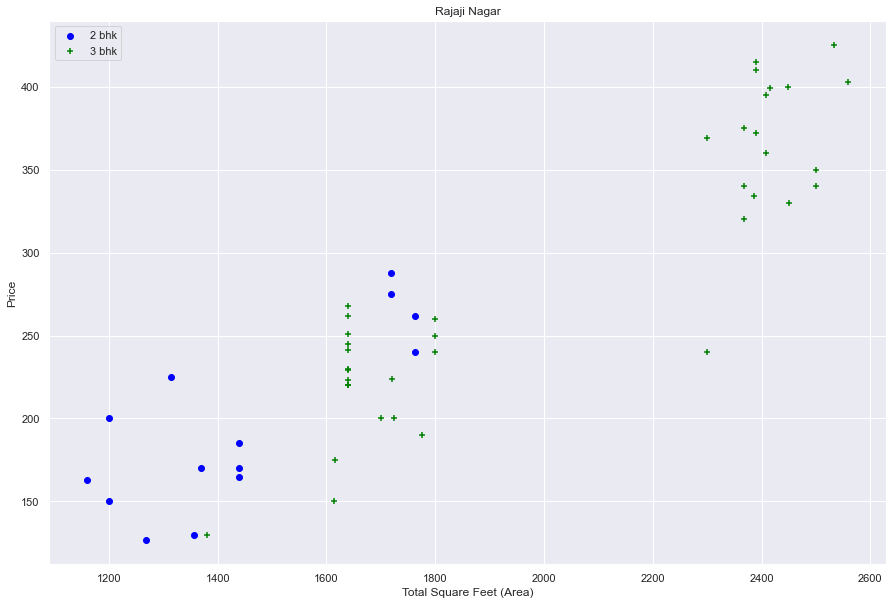

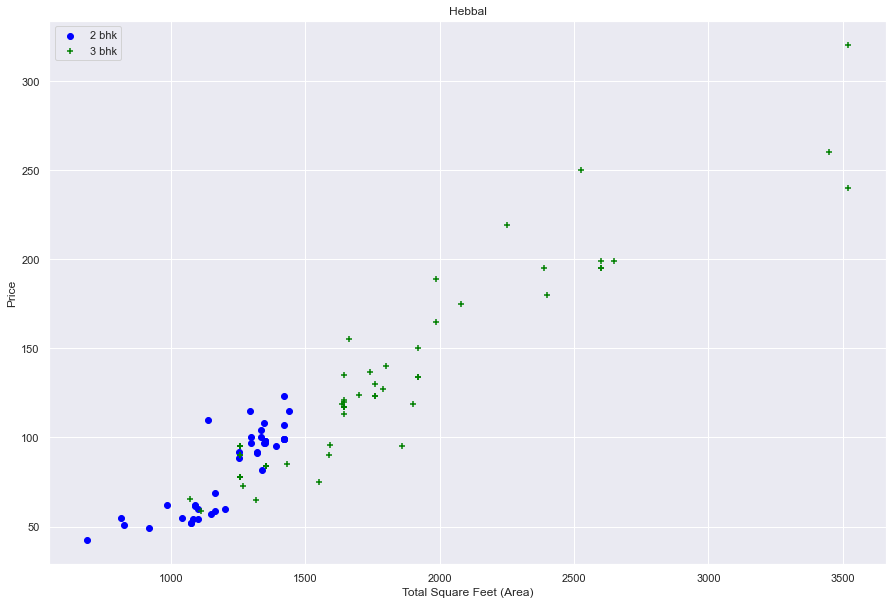

In [24]:
def plot_scatter_plot(df , location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft , bhk2.price ,color= 'blue', label='2 bhk')
    plt.scatter(bhk3.total_sqft , bhk3.price ,color= 'green',marker='+', label='3 bhk')
    plt.xlabel("Total Square Feet (Area)")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
for location in ['Rajaji Nagar' , 'Hebbal']:
    plot_scatter_plot(df7,location)

✅**To fix this problem, we should remove properties where for the same location & same sqft,the price of 2 bhk apartment is more than 3 bhk apartment.What we will do is for a given location, we will build a dictionary of stats per bhk, i.e: Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```

(7329, 7)


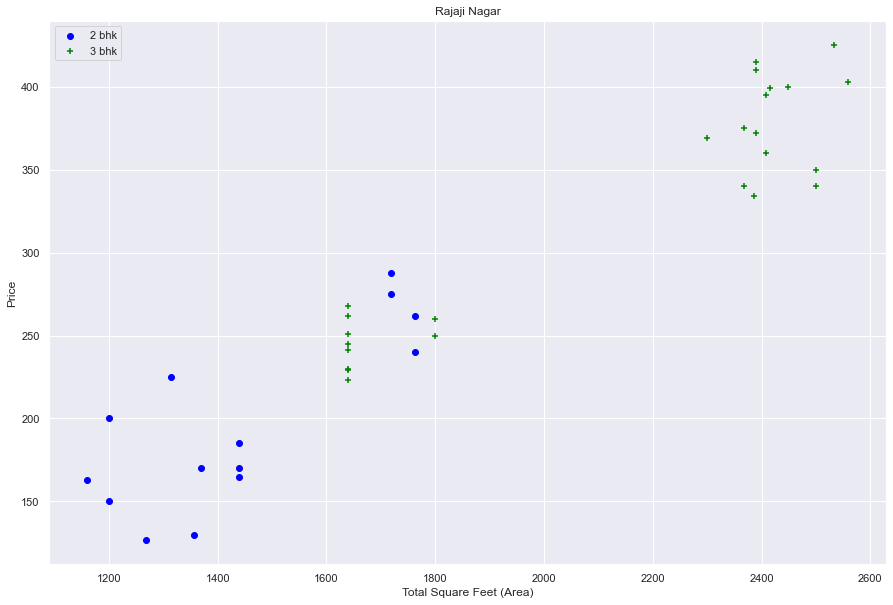

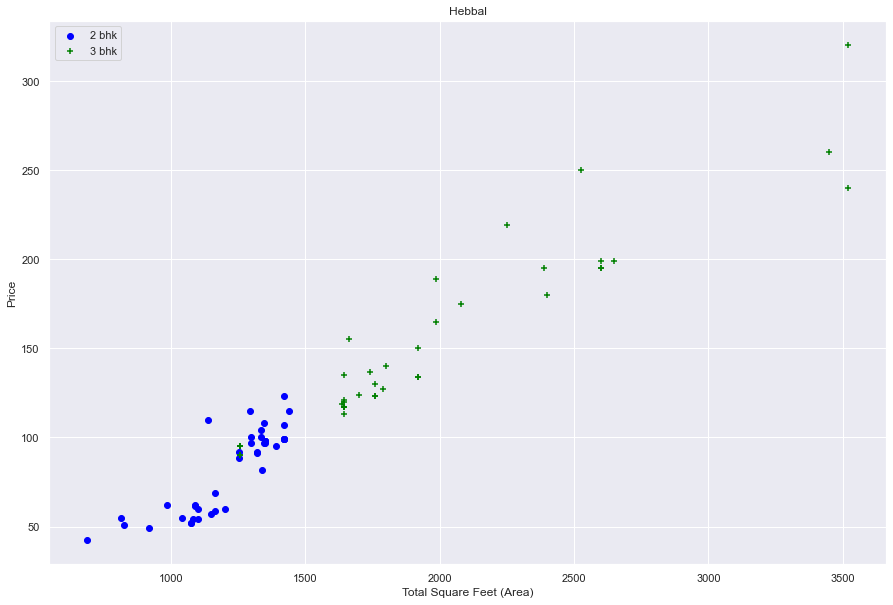

In [25]:
def remove_bhk_outliers(df):
    excluded_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean':np.mean(bhk_df.price_per_sqft),
                              'std':np.std(bhk_df.price_per_sqft),
                              'count':bhk_df.shape[0]}
        
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1) # when bhk=2 give me stats of bhk=1 to compare
            if stats and stats['count'] > 5:
                excluded_indices = np.append(excluded_indices,bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index)
                
    return df.drop(excluded_indices,axis=0)
                
df8 = remove_bhk_outliers(df7)
print(df8.shape)

# plot again to see the differance:
for location in ['Rajaji Nagar' , 'Hebbal']:
    plot_scatter_plot(df8,location)

**✅Once these outliers are removed, lets dicover how many properties per ` price per sqft ` ranges:**

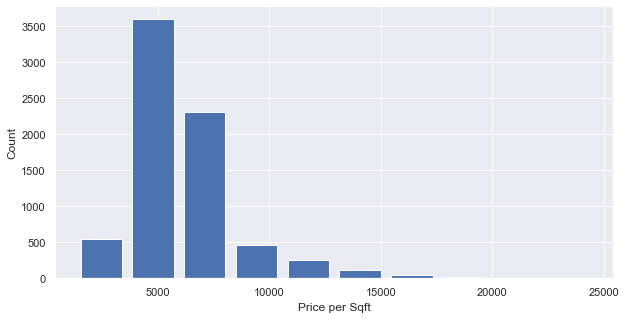

In [26]:
plt.figure(figsize=(10,5))
plt.hist(df8.price_per_sqft , rwidth=0.8) # rwidth = bar width
plt.xlabel('Price per Sqft')
plt.ylabel('Count');

### Bathrooms.
Checking if the num of `baths` is reasonable with respect to `total_sqft` & `num of bhk`.

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]

Properties that have more than 10 baths : 
             location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424


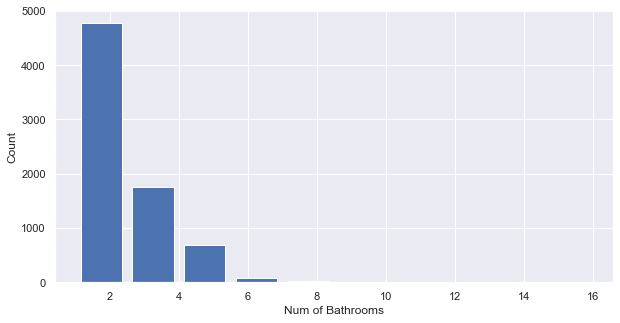

In [27]:
print(df8.bath.unique())
print('\nProperties that have more than 10 baths : \n',df8[df8.bath>10])

plt.figure(figsize=(10,5))
plt.hist(df8.bath , rwidth=0.8) # rwidth = bar width
plt.xlabel('Num of Bathrooms')
plt.ylabel('Count');

✅**After discussing with the business manager,he said that it's unusual to have 2 more bathrooms than the num of bedrooms in a home. If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.**

In [28]:
bath_outliers = df8[df8.bath > df8.bhk+1].index
df9 = df8.drop(bath_outliers , axis=0)
df9.shape

(7251, 7)

### Removing Useless cols.
✅**`size` can be represented by `bhk`, remember dimensionality reduction.`price_per_sqft` was used for outlier detection.**

In [29]:
df10 = df9.drop(['size' , 'price_per_sqft'] , axis=1)
print(df10.shape)
df10.head(2)

(7251, 5)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


## Handling `location` Categorical feature.

In [30]:
dum_locations = pd.get_dummies(df10.location , drop_first=True)

df11 = pd.concat([df10 , dum_locations],axis=1)
df11.drop('location',axis=1,inplace=True)
df11.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4️⃣ Model Building.

In [62]:
# Identify X & y :
X = df11.drop('price',axis=1)
y = df11.price

# Apply train_test_split :
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Try linear regression model :
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)  

0.845227769787241

**✅The score is pretty decent. Typically the data scientist would try different models with different parameters to come up with best optimal model.**

In [63]:
# APPly cross validation :
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
cross_val_score(LinearRegression() , X , y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

**✅ After using K Fold cross validation to measure accuracy of our LinearRegression model.We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose.**

**Find Best model with Best Parameters using GridSearchCV :**

In [37]:
# The different models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# import the method by which we gonna get the best model & params:
from sklearn.model_selection import GridSearchCV

def find_best_model_and_params_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{'normalize':[True,False]}},
        
        'lasso':{
            'model':Lasso(),
            'params':{'alpha':[1,2],'selection':['random','cyclic']}},
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}}
            }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        GS = GridSearchCV(config['model'],config['params'],cv=cv,
                                                  return_train_score=False)
        GS.fit(X,y)
        scores.append({'model':algo_name,'best_score':GS.best_score_,
                      'best_params':GS.best_params_})
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
find_best_model_and_params_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.699273,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.771351,"{'criterion': 'mse', 'splitter': 'best'}"


- ### Which features contribute the most in the property's price ?
**✅feature_importance_ using  ExtraTreesRegressor**

                 feature_imp
total_sqft          0.542116
bath                0.128602
bhk                 0.089538
Cunningham Road     0.050414
Malleshwaram        0.044541


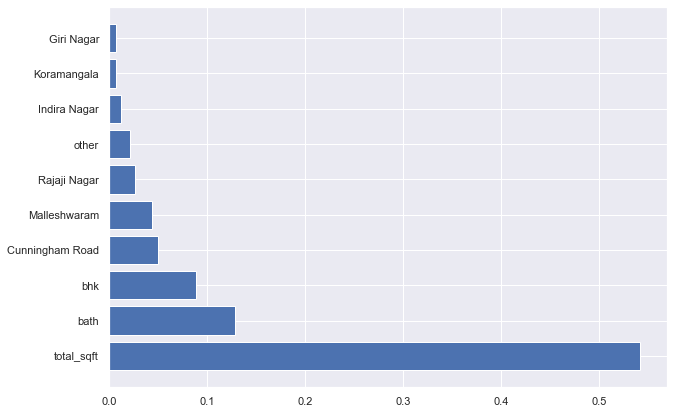

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor().fit(X,y)

features_imp = pd.DataFrame(selection.feature_importances_, X.columns,['feature_imp']).sort_values('feature_imp',
                                                                                             ascending=False)

print(features_imp.head())
plt.figure(figsize=(10,7))
plt.barh(features_imp.index[:10],features_imp['feature_imp'][:10])
plt.show()

- ### Test The Model :

In [65]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)

In [73]:
# This to get the col's index :
print(np.where(X.columns == '1st Phase JP Nagar'))
print(np.where(X.columns == '1st Phase JP Nagar')[0][0])

X.head(1)

(array([3], dtype=int64),)
3


,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
def predict_price(location , sqft , bath , bhk):
    all_features = X.columns
    # get location index to set it = 1 & all the others = 0
    location_index = np.where(all_features == location)[0][0]
    # prepare X vector to feed it to the lin_reg model :
    X_feed = np.zeros(len(all_features))
    X_feed[0] = sqft
    X_feed[1] = bath
    X_feed[2] = bhk
    X_feed[location_index] = 1
    return lr.predict([X_feed])[0]

# try out :
print(predict_price('1st Phase JP Nagar',1000, 2, 2))
print(predict_price('1st Phase JP Nagar',1000, 2, 2))
print(predict_price('Indira Nagar',1000, 2, 2))
print(predict_price('Indira Nagar',1000, 3, 3))

83.4990467690969
93.65709665820916
181.27815484009085
184.58430202036035


- ### Export the tested model to a pickle file:

In [71]:
import pickle
with open('home_prices_lr_model.pickle','wb') as file:
    pickle.dump(lr,file)

- ### Export location and column information to a file that will be useful later on in our prediction application :

In [72]:
import json
columns = {'data_columns' : [col.lower() for col in X.columns]}
with open('columns.json' , 'w') as file:
    file.write(json.dumps(columns))